In [1]:
import pandas as pd
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:

sys.path.append('c:\\Users\\salah\\CKD\\src')

from model import define_and_train_models , save_models
from preprocessing import preprocess_data

In [3]:
DATA_PATH = '../data/raw.csv'
TARGET_COLUMN = 'classification' 

In [4]:
# Preprocessing
X, y = preprocess_data(DATA_PATH , TARGET_COLUMN)
data = pd.read_csv(DATA_PATH)

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
trained_models = define_and_train_models(X_train, y_train)

Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training XGBoost...
Training CatBoost...
Training K-Nearest Neighbors...
Training Naive Bayes...
All models have been trained successfully.



In [6]:
# Evaluate models
accuracies = {}
for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, zero_division=1))

# Print accuracies
for name, accuracy in accuracies.items():
    print(f"{name} Accuracy: {accuracy:.4f}")


Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.9875
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Evaluating SVM...
SVM Accuracy: 0.8125
              precision    recall  f1-score   support

           0       0.68      0.89      0.77        28
           1       0.93      0.77      0.84        52

    accuracy                           0.81        80
   macro avg       0.80      0.83      0.81        80
weighted avg       0.84      0.81      0.82        80

Evaluating Decision Tree...
Decision Tree Accuracy: 0.9875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy 

In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Evaluate models
results = []
for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
    
    results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1})

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print table
print(results_df.to_string(index=False))


Evaluating Logistic Regression...
Evaluating SVM...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating XGBoost...
Evaluating CatBoost...
Evaluating K-Nearest Neighbors...
Evaluating Naive Bayes...
              Model  Accuracy  F1 Score
Logistic Regression    0.9875  0.987446
                SVM    0.8125  0.816599
      Decision Tree    0.9875  0.987549
      Random Forest    0.9875  0.987446
  Gradient Boosting    0.9875  0.987549
            XGBoost    0.9750  0.975000
           CatBoost    0.9875  0.987549
K-Nearest Neighbors    0.8750  0.877821
        Naive Bayes    0.9750  0.975000


In [19]:
import pandas as pd

# Data
data = {
    "Model": [
        "Logistic Regression", "SVM", "Decision Tree", "Random Forest", "Gradient Boosting",
        "XGBoost", "CatBoost", "K-Nearest Neighbors", "Naive Bayes"
    ],
    "Accuracy": [
        0.9875, 0.8125, 0.9875, 0.9875, 0.9875, 0.9750, 0.9875, 0.8750, 0.9750
    ],
    "F1 Score": [
        0.987446, 0.816599, 0.987549, 0.987446, 0.987549, 0.975000, 0.987549, 0.877821, 0.975000
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('model_evaluation_results.csv', index=False)

print("Results saved to model_evaluation_results.csv")


Results saved to model_evaluation_results.csv


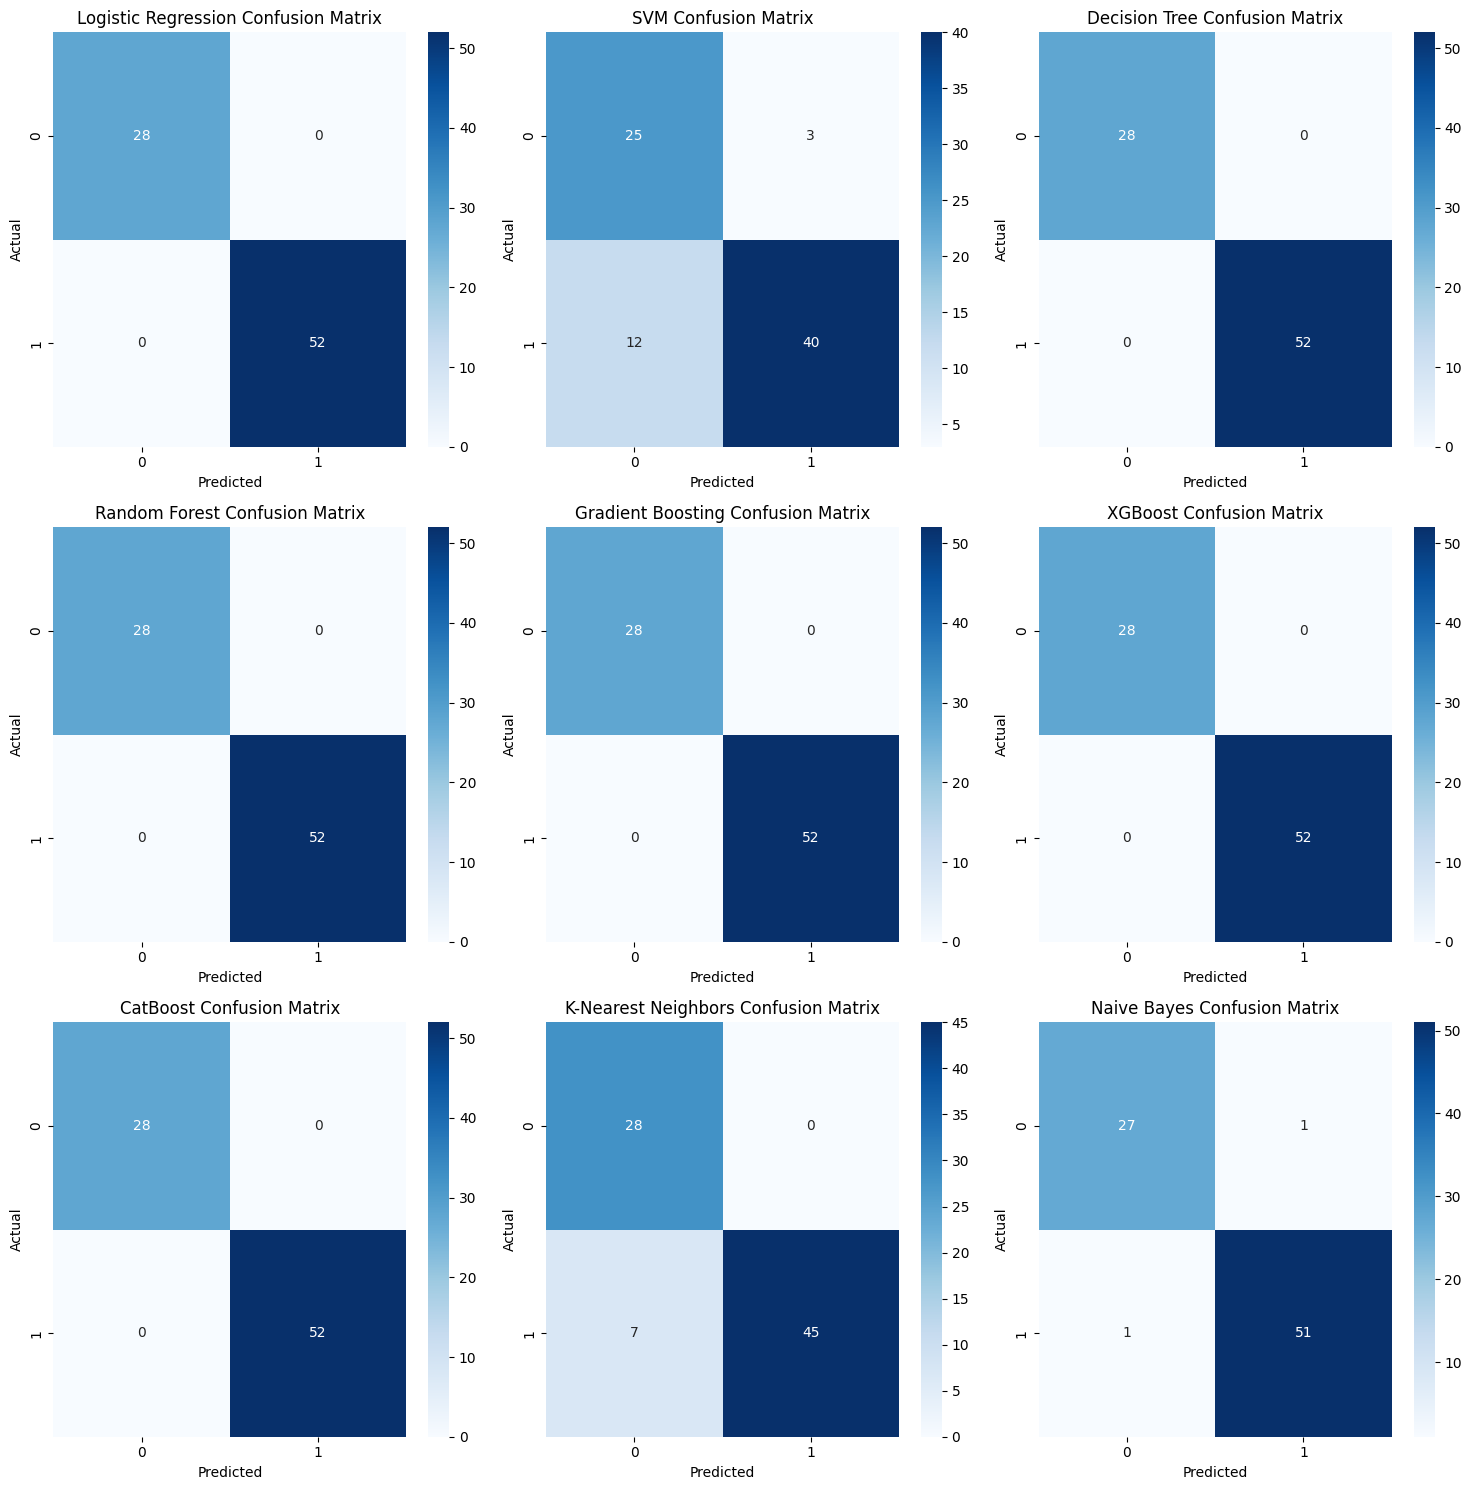

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define number of rows and columns based on model count
num_models = len(trained_models)
cols = min(3, num_models)  # At most 3 columns
rows = (num_models + cols - 1) // cols  # Calculate required rows

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot confusion matrices for each model
for i, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=axes[i], cbar=True) 
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


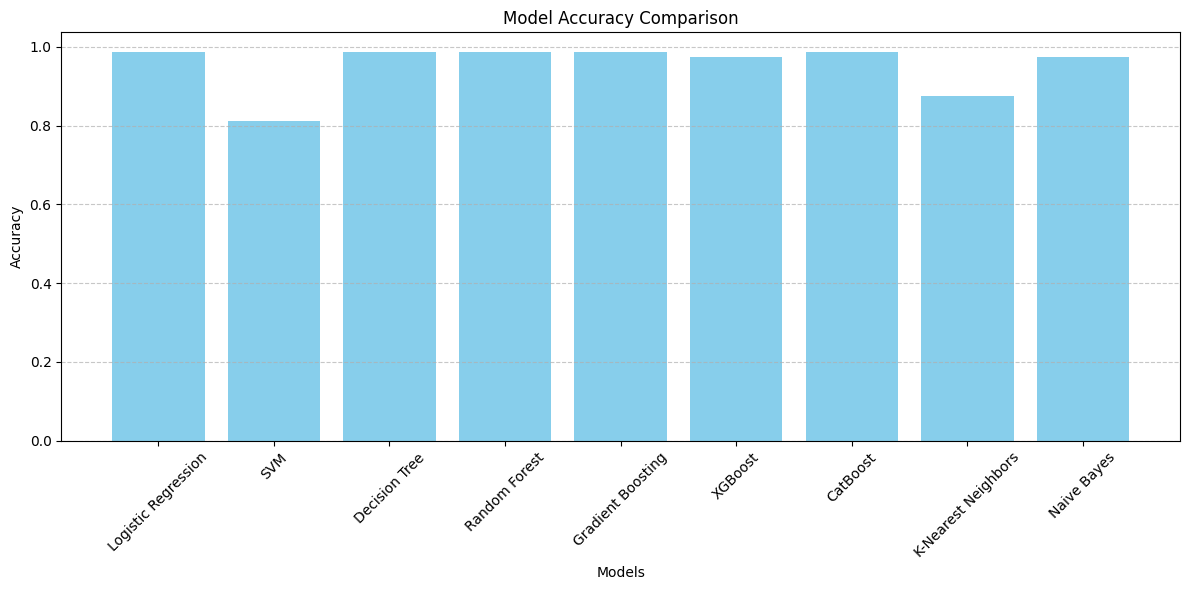

In [9]:
# Plot accuracies
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

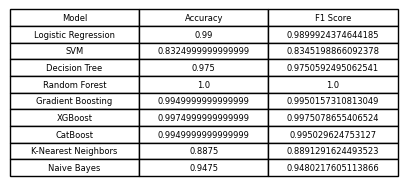

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

# Define K-Fold Cross-Validation
K = 5
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

results = []
for name, model in trained_models.items():
    accuracies = []
    f1_scores = []

    for train_idx, val_idx in kf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        accuracies.append(accuracy_score(y_val, y_pred))
        f1_scores.append(f1_score(y_val, y_pred, average="weighted", zero_division=1))

    # Store mean accuracy and F1 Score
    results.append({"Model": name, "Accuracy": np.mean(accuracies), "F1 Score": np.mean(f1_scores)})

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot Table and Save as Image
fig, ax = plt.subplots(figsize=(5, 2))  # Adjust size for compact display
ax.axis("tight")
ax.axis("off")
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc="center")

# Save as Image
plt.savefig("cross_validation_results.png", dpi=300, bbox_inches='tight')
plt.show()


Spliting Data for different test to train Ratios


Testing with split ratio (test_size=0.1):
Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training XGBoost...
Training CatBoost...
Training K-Nearest Neighbors...
Training Naive Bayes...
All models have been trained successfully.


Testing with split ratio (test_size=0.2):
Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training XGBoost...
Training CatBoost...
Training K-Nearest Neighbors...
Training Naive Bayes...
All models have been trained successfully.


Testing with split ratio (test_size=0.3):
Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training XGBoost...
Training CatBoost...
Training K-Nearest Neighbors...
Training Naive Bayes...
All models have been trained successfully.


Testing with split ratio (test_size=0.4):
Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training XGBoost...
Training CatBoost...
Training K-Nearest Neighbors...
Training Naive Bayes...
All models have been trained successfully.


Testing with split ratio (test_size=0.5):
Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training XGBoost...
Training CatBoost...
Training K-Nearest Neighbors...
Training Naive Bayes...
All models have been trained successfully.



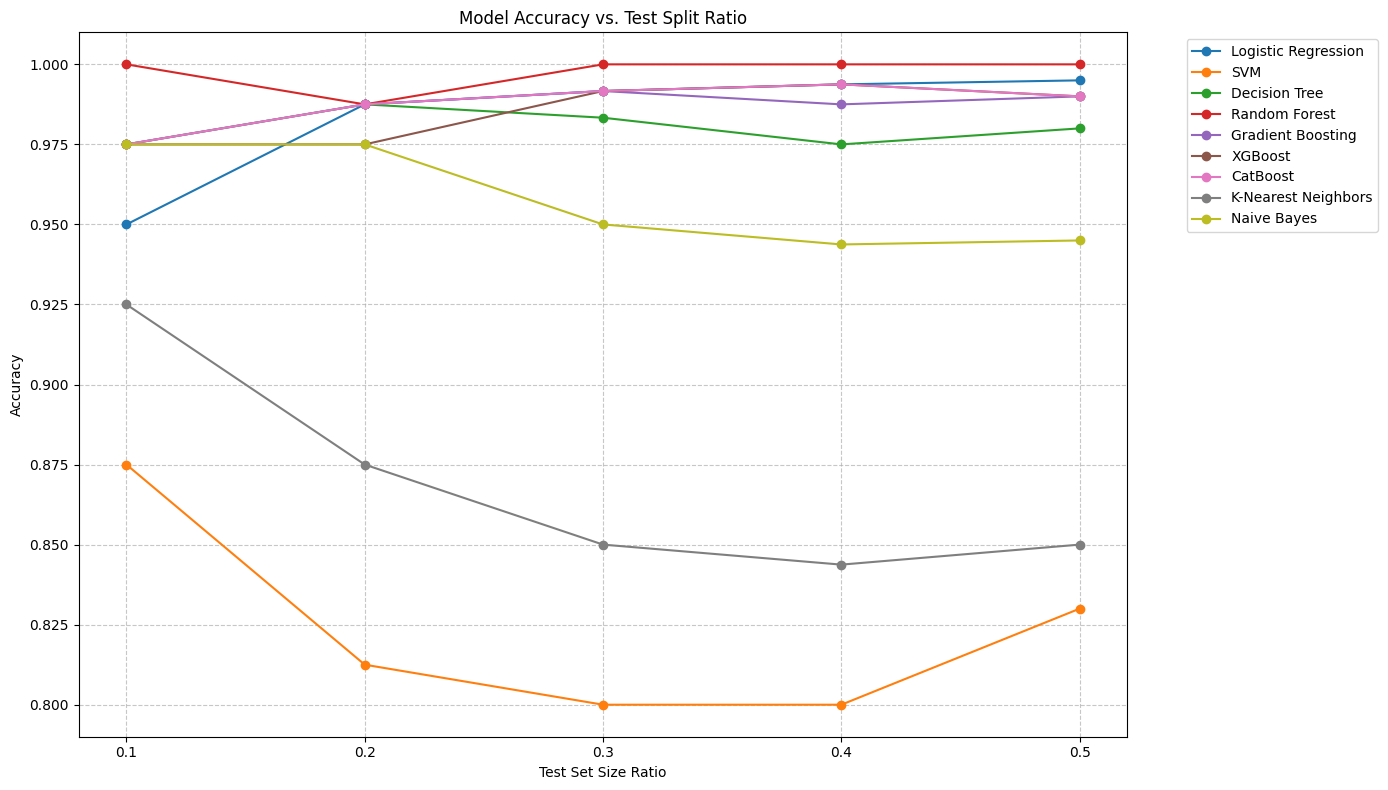

In [8]:

split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5] 
accuracy_results = {name: [] for name in [
    "Logistic Regression",
    "SVM",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "XGBoost",
    "CatBoost",
    "K-Nearest Neighbors",
    "Naive Bayes"
]}


for test_size in split_ratios:
    print(f"\nTesting with split ratio (test_size={test_size}):")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    trained_models = define_and_train_models(X_train, y_train)
    
    for name, model in trained_models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[name].append(accuracy)


plt.figure(figsize=(14, 8))
for model_name, accuracies in accuracy_results.items():
    plt.plot(split_ratios, accuracies, marker='o', label=model_name)

plt.title("Model Accuracy vs. Test Split Ratio")
plt.xlabel("Test Set Size Ratio")
plt.ylabel("Accuracy")
plt.xticks(split_ratios)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating Logistic Regression...
Evaluating SVM...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating XGBoost...
Evaluating CatBoost...
Evaluating K-Nearest Neighbors...
Evaluating Naive Bayes...


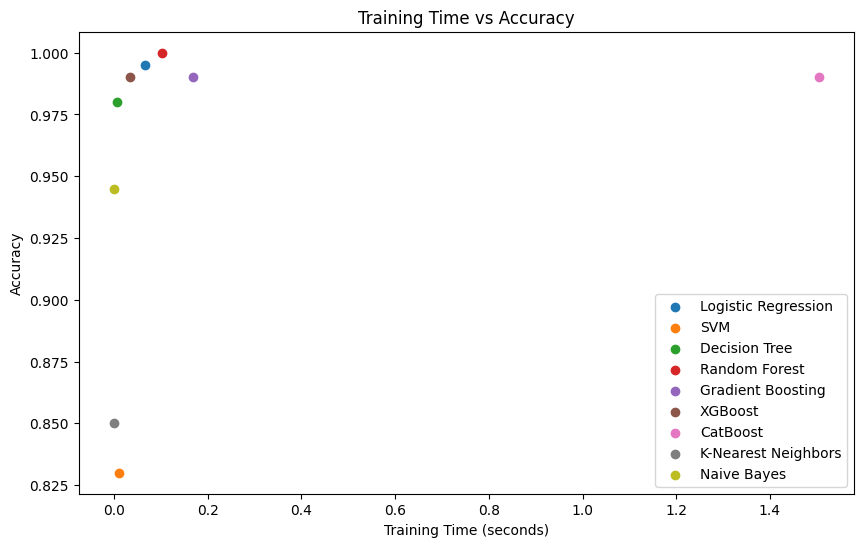

In [9]:
# Ensure accuracies is a dictionary
accuracies = {}

# Training times
training_times = {}
for name, model in trained_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_times[name] = time.time() - start_time
    
    # Evaluate model
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Scatter Plot
plt.figure(figsize=(10, 6))
for name in accuracies.keys():
    plt.scatter(training_times[name], accuracies[name], label=name)
plt.xlabel("Training Time (seconds)")
plt.ylabel("Accuracy")
plt.title("Training Time vs Accuracy")
plt.legend()
plt.show()


Generating learning curve for Logistic Regression...
Generating learning curve for SVM...
Generating learning curve for Decision Tree...
Generating learning curve for Random Forest...
Generating learning curve for Gradient Boosting...
Generating learning curve for XGBoost...
Generating learning curve for CatBoost...
Generating learning curve for K-Nearest Neighbors...
Generating learning curve for Naive Bayes...


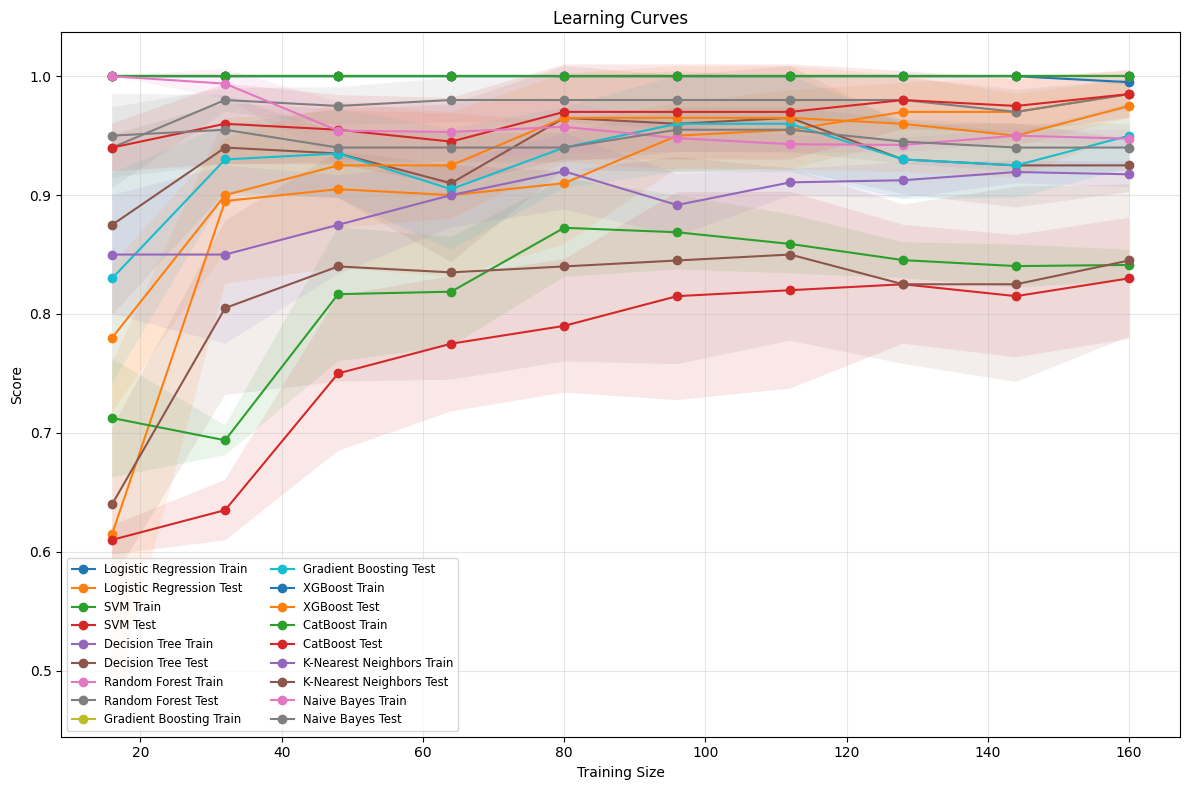

In [10]:
plt.figure(figsize=(12, 8))

for name, model in trained_models.items():
    print(f"Generating learning curve for {name}...")
    
    # Get learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        model, 
        X_train, 
        y_train, 
        cv=5, 
        n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Calculate mean and standard deviation for scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve for training data
    plt.plot(train_sizes, train_mean, 'o-', label=f'{name} Train')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

    # Plot learning curve for testing data
    plt.plot(train_sizes, test_mean, 'o-', label=f'{name} Test')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title("Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best", fontsize='small', ncol=2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Generating learning curve for Logistic Regression...
Generating learning curve for SVM...
Generating learning curve for Decision Tree...
Generating learning curve for Random Forest...
Generating learning curve for Gradient Boosting...
Generating learning curve for XGBoost...
Generating learning curve for CatBoost...
Generating learning curve for K-Nearest Neighbors...
Generating learning curve for Naive Bayes...


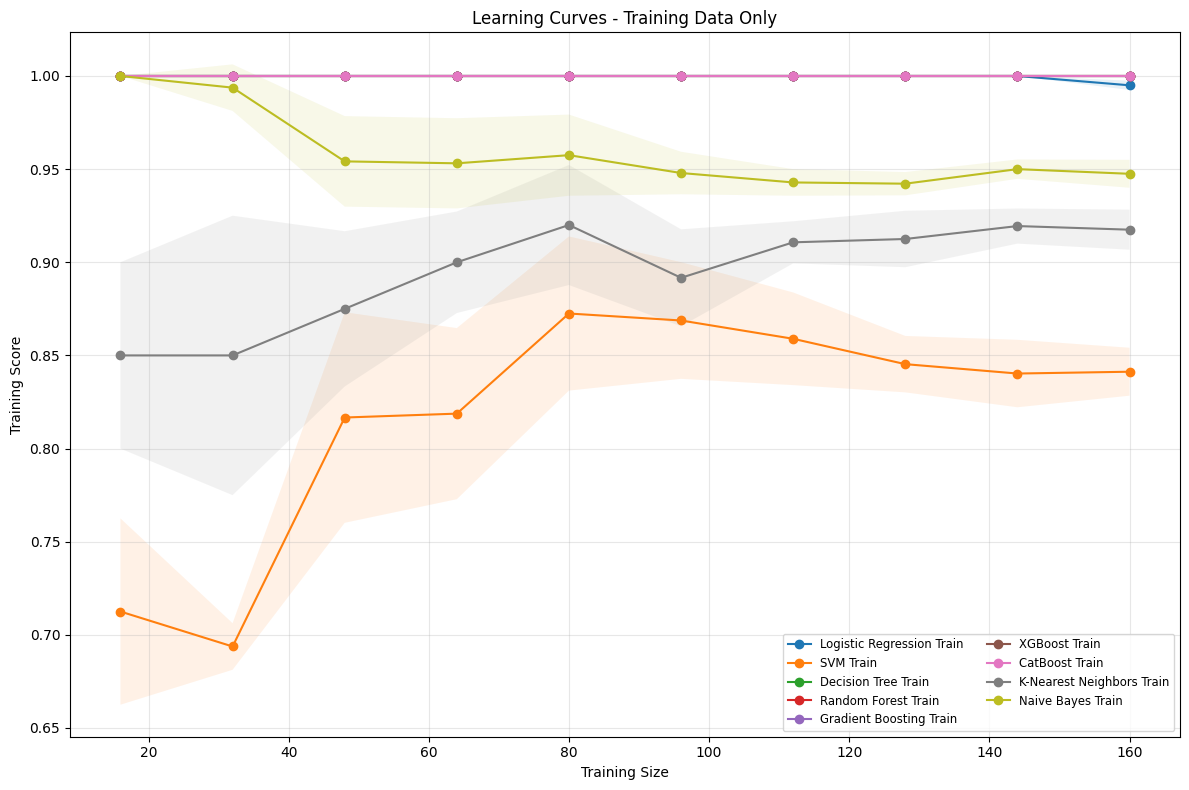

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

plt.figure(figsize=(12, 8))

for name, model in trained_models.items():
    print(f"Generating learning curve for {name}...")
    
    # Get learning curve data (only for training data)
    train_sizes, train_scores, _ = learning_curve(
        model, 
        X_train, 
        y_train, 
        cv=5, 
        n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Calculate mean and standard deviation for training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Plot learning curve for training data
    plt.plot(train_sizes, train_mean, 'o-', label=f'{name} Train')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.title("Learning Curves ")
plt.xlabel("Training Size")
plt.ylabel("Training Score")
plt.legend(loc="best", fontsize='small', ncol=2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [12]:
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', verbosity=0),
    "CatBoost": CatBoostClassifier(verbose=0),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Assuming X_train and y_train are already defined
# Let's say your data has 24 features
features = X_train.columns.tolist()

# Generate combinations of features (from 2 to 24)
feature_combinations = []
for r in range(2, 25):
    feature_combinations.extend(itertools.combinations(features, r))

# Store results
results = []

# Iterate over all combinations of features
for feature_combo in feature_combinations:
    X_train_combo = X_train[list(feature_combo)]  # Select features from the current combination
    X_test_combo = X_test[list(feature_combo)]  # Select features for the test set

    for model_name, model in models.items():
        print(f"Training {model_name} with features {feature_combo}...")
        
        # Train the model
        model.fit(X_train_combo, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_combo)
        
        # Calculate accuracy or any other performance metric
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the result
        results.append({
            "Model": model_name,
            "Features": feature_combo,
            "Accuracy": accuracy
        })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)


Training Logistic Regression with features ('age', 'bp')...
Training SVM with features ('age', 'bp')...
Training Decision Tree with features ('age', 'bp')...
Training Random Forest with features ('age', 'bp')...
Training Gradient Boosting with features ('age', 'bp')...
Training XGBoost with features ('age', 'bp')...
Training CatBoost with features ('age', 'bp')...
Training K-Nearest Neighbors with features ('age', 'bp')...
Training Naive Bayes with features ('age', 'bp')...
Training Logistic Regression with features ('age', 'sg')...
Training SVM with features ('age', 'sg')...
Training Decision Tree with features ('age', 'sg')...
Training Random Forest with features ('age', 'sg')...
Training Gradient Boosting with features ('age', 'sg')...
Training XGBoost with features ('age', 'sg')...
Training CatBoost with features ('age', 'sg')...
Training K-Nearest Neighbors with features ('age', 'sg')...
Training Naive Bayes with features ('age', 'sg')...
Training Logistic Regression with features

c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training K-Nearest Neighbors with features ('su', 'sod', 'rc')...
Training Naive Bayes with features ('su', 'sod', 'rc')...
Training Logistic Regression with features ('su', 'sod', 'htn')...
Training SVM with features ('su', 'sod', 'htn')...
Training Decision Tree with features ('su', 'sod', 'htn')...
Training Random Forest with features ('su', 'sod', 'htn')...
Training Gradient Boosting with features ('su', 'sod', 'htn')...
Training XGBoost with features ('su', 'sod', 'htn')...
Training CatBoost with features ('su', 'sod', 'htn')...
Training K-Nearest Neighbors with features ('su', 'sod', 'htn')...
Training Naive Bayes with features ('su', 'sod', 'htn')...
Training Logistic Regression with features ('su', 'sod', 'dm')...
Training SVM with features ('su', 'sod', 'dm')...
Training Decision Tree with features ('su', 'sod', 'dm')...
Training Random Forest with features ('su', 'sod', 'dm')...
Training Gradient Boosting with features ('su', 'sod', 'dm')...
Training XGBoost with features ('s

KeyboardInterrupt: 

C:\Users\salah\AppData\Local\Temp\ipykernel_22168\1959530427.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Accuracy', data=results_df, palette='Set2')


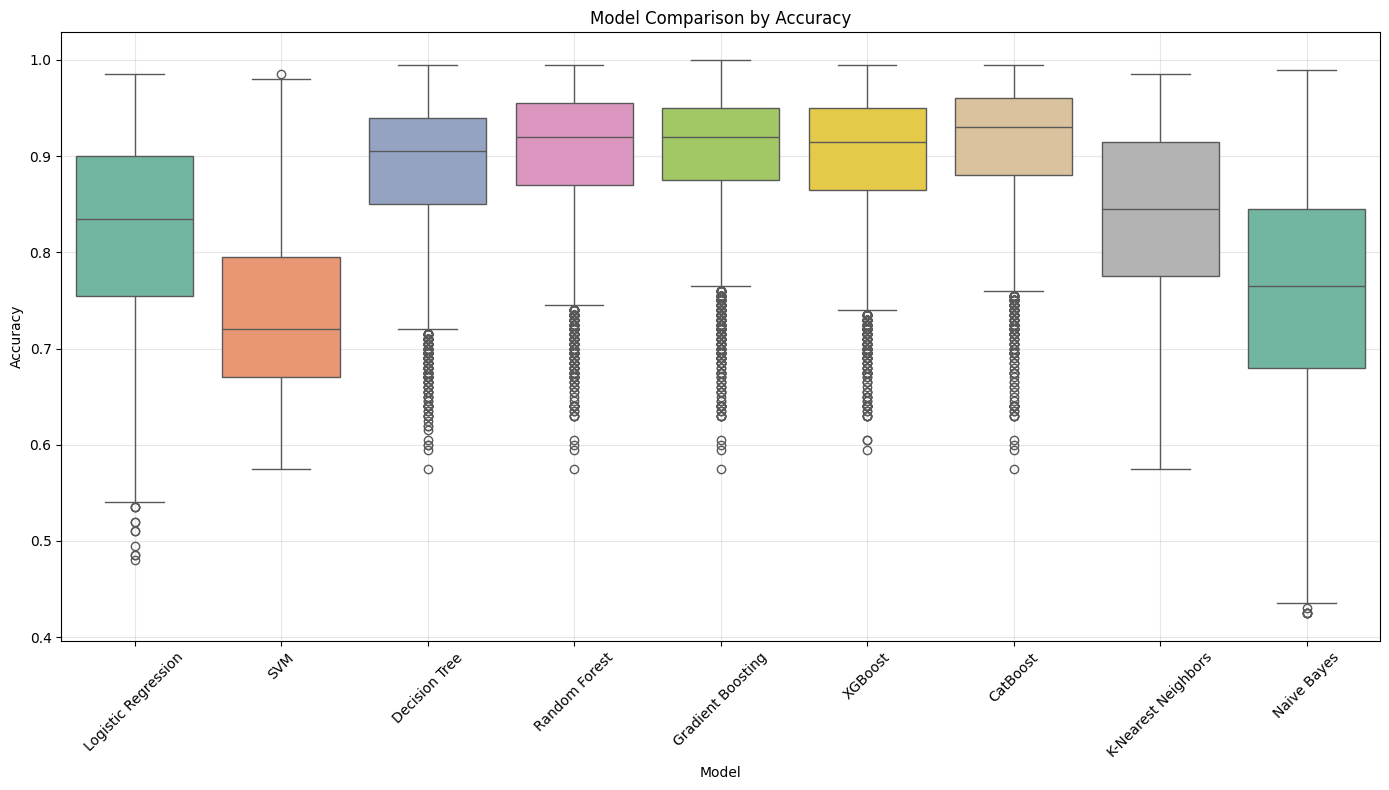

TypeError: 'value' must be an instance of str or bytes, not a tuple

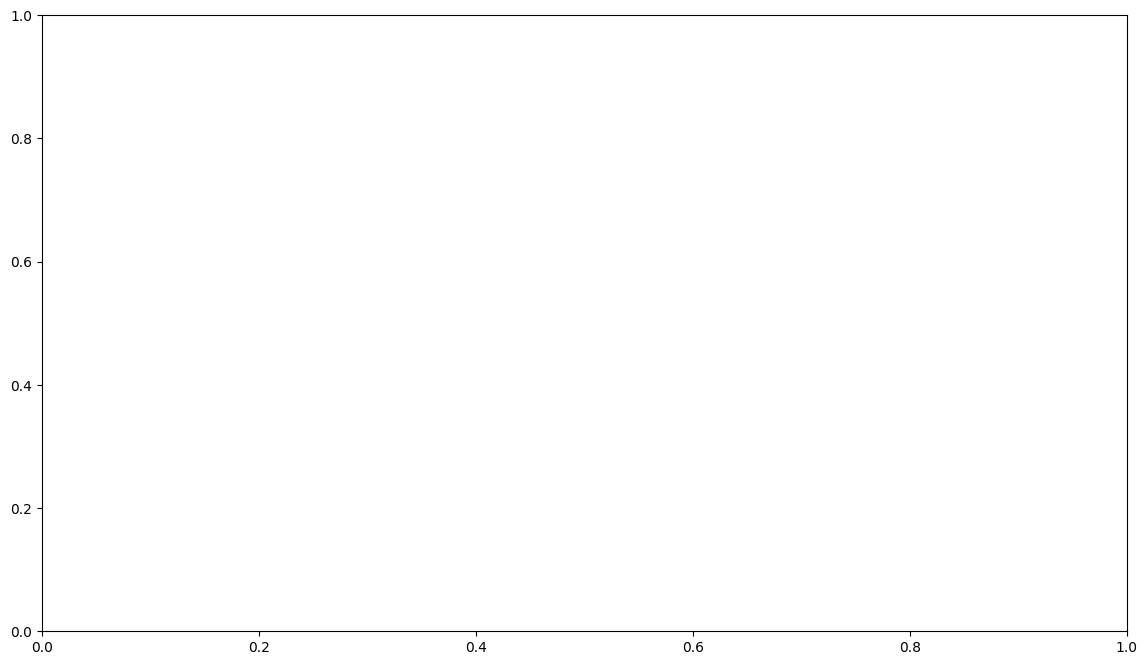

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Set up the figure
plt.figure(figsize=(14, 8))

# Plot accuracy by model
sns.boxplot(x='Model', y='Accuracy', data=results_df, palette='Set2')
plt.title('Model Comparison by Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot accuracy by feature combination (for the best model, for example)
best_model = results_df.groupby('Model')['Accuracy'].max().idxmax()
best_model_results = results_df[results_df['Model'] == best_model]

# Plot accuracy vs feature combinations for the best model
plt.figure(figsize=(14, 8))
sns.lineplot(data=best_model_results, x='Features', y='Accuracy', marker='o')
plt.title(f'Accuracy vs Feature Combinations for {best_model}')
plt.xlabel('Feature Combination')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


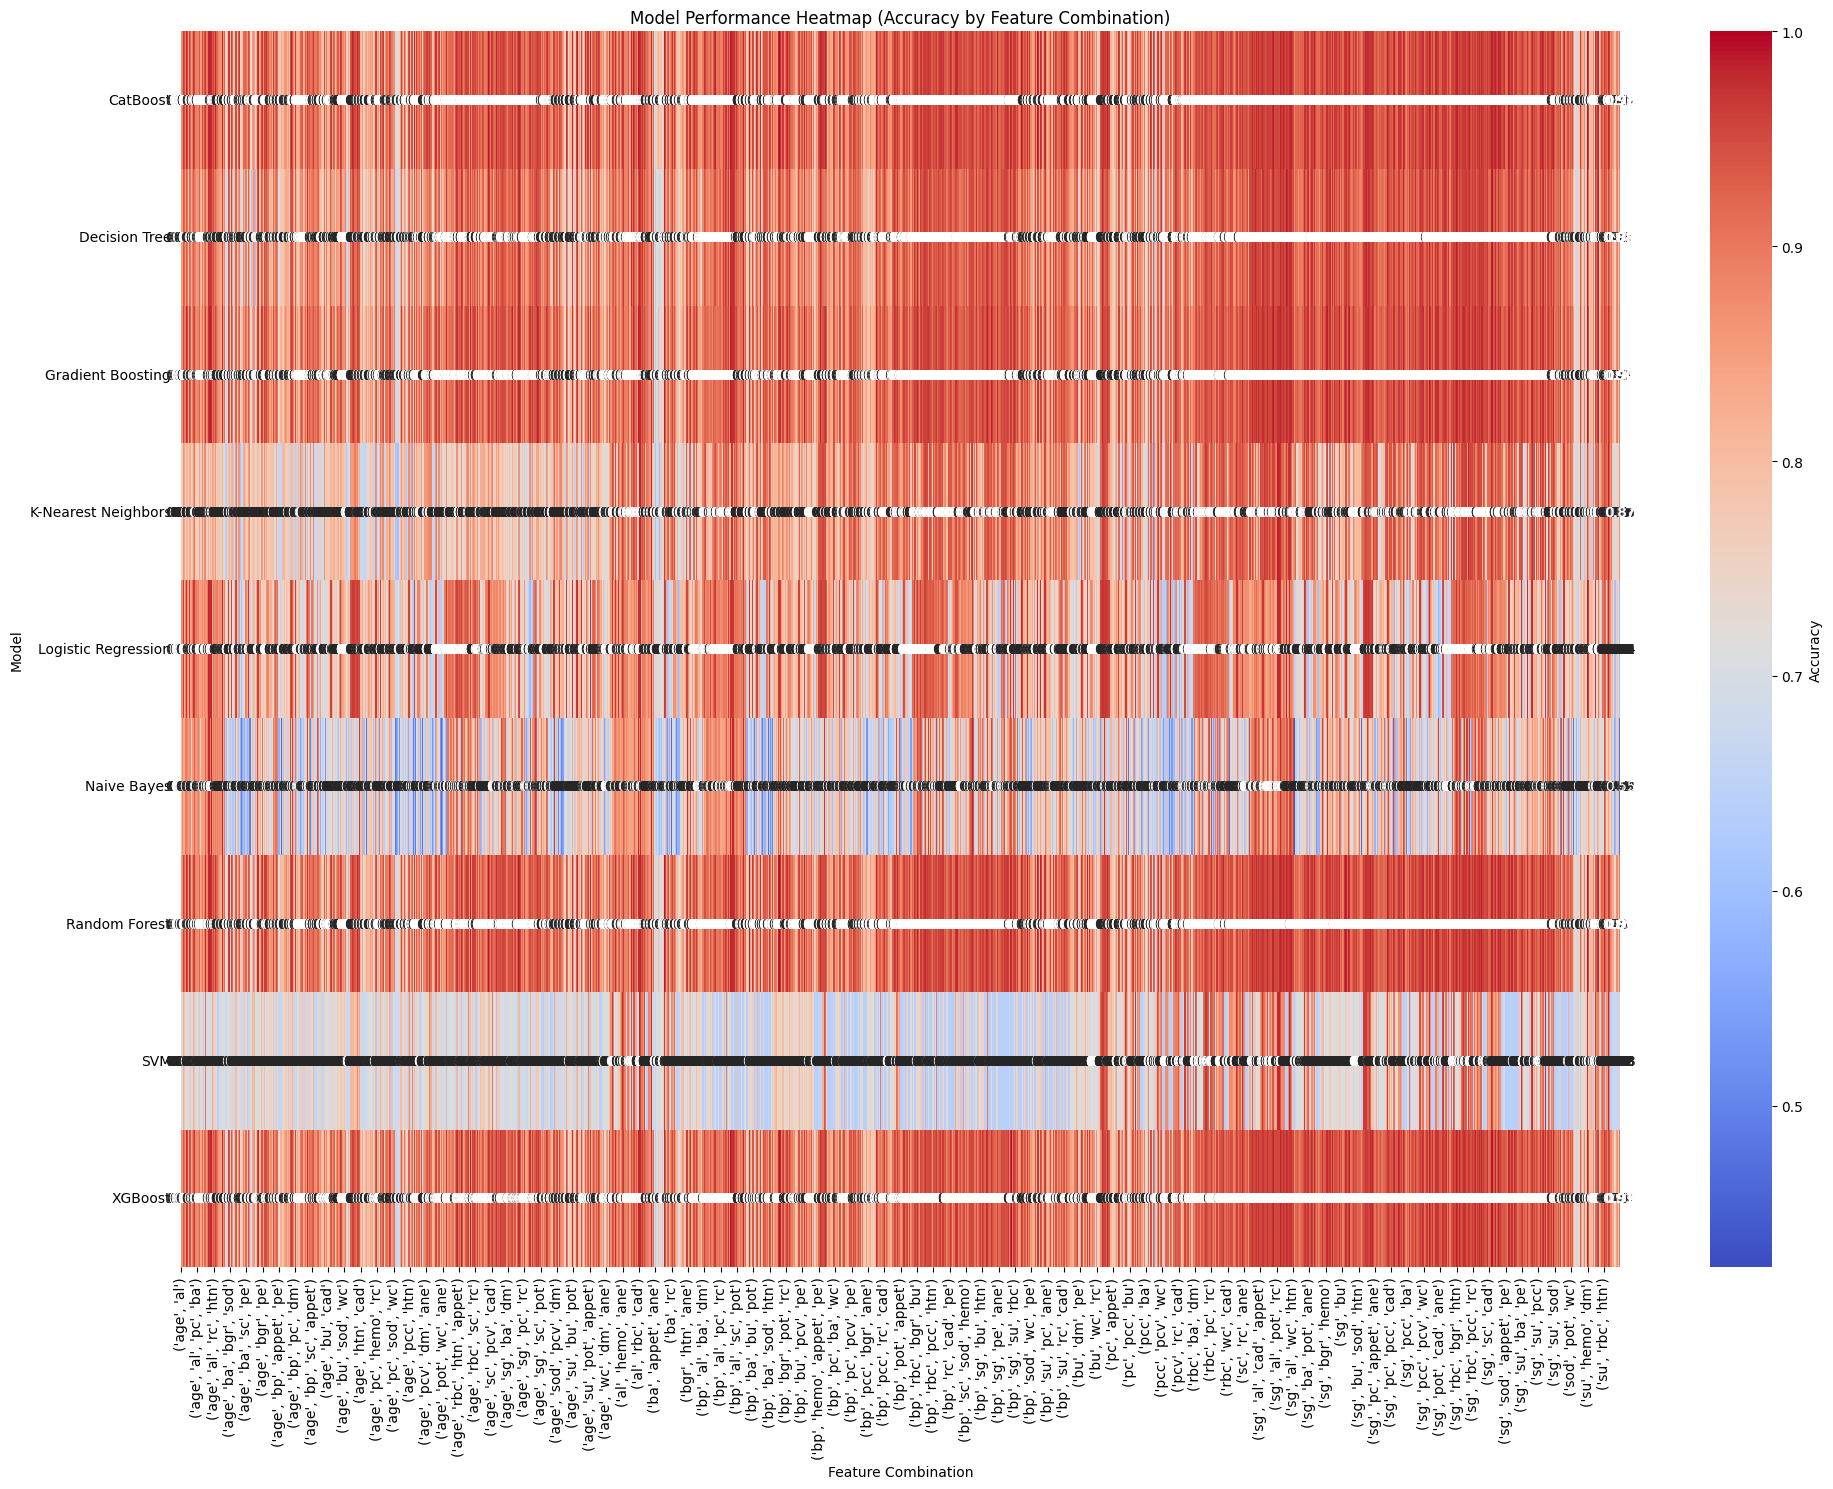

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the results to create a heatmap-friendly DataFrame
heatmap_data = results_df.pivot_table(index='Model', columns='Features', values='Accuracy')

# Plot heatmap
plt.figure(figsize=(20,15))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Accuracy'})
plt.title('Model Performance Heatmap (Accuracy by Feature Combination)')
plt.xlabel('Feature Combination')
plt.ylabel('Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


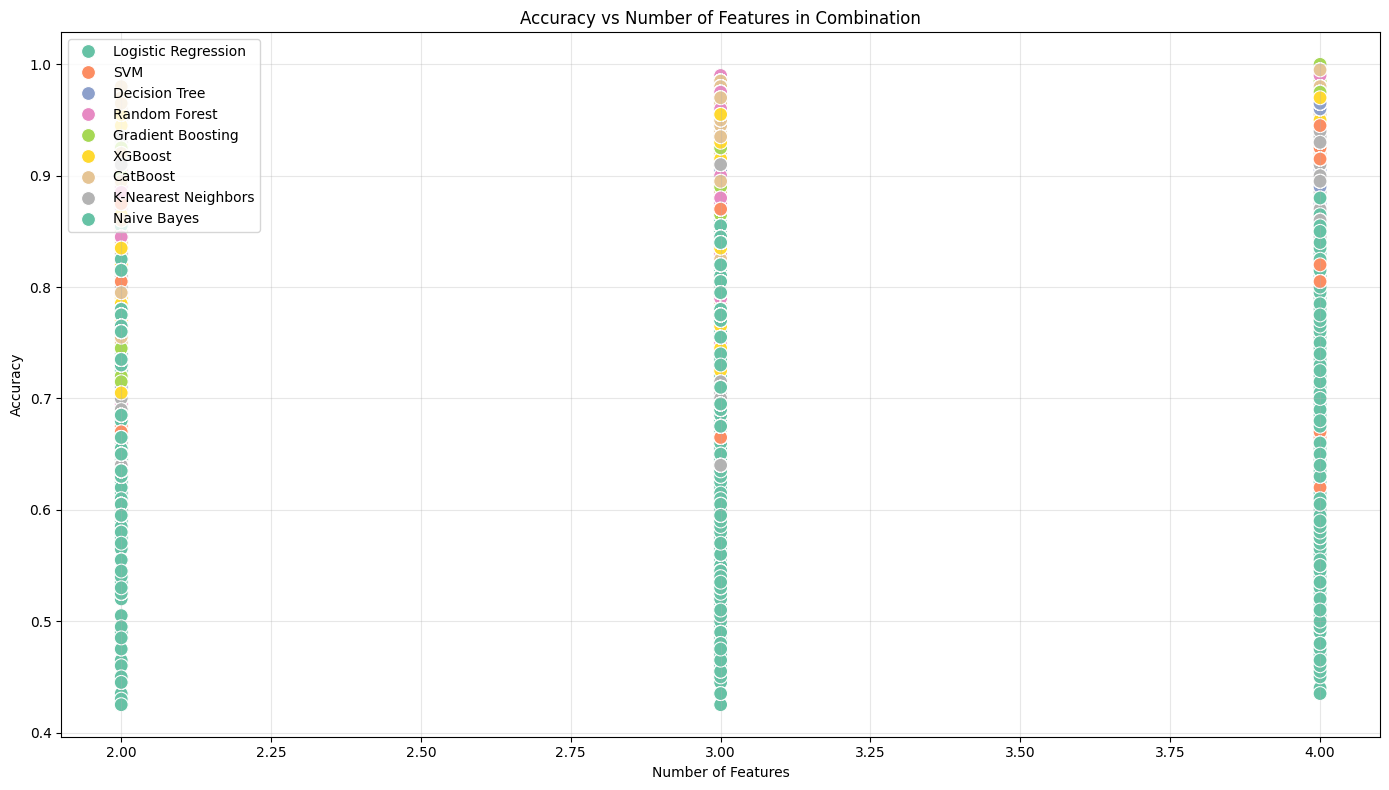

In [16]:
# Create a new column to represent the number of features in each combination
results_df['Num_Features'] = results_df['Features'].apply(lambda x: len(x))

# Scatter plot for accuracy vs. number of features in combination
plt.figure(figsize=(14, 8))
sns.scatterplot(data=results_df, x='Num_Features', y='Accuracy', hue='Model', palette='Set2', s=100, marker='o')
plt.title('Accuracy vs Number of Features in Combination')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier  # Example model

# Define the model (RandomForest in this case)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the full dataset
model.fit(X_train, y_train)

# Calculate accuracy on the full dataset
y_pred_full = model.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Initialize a dictionary to store results
feature_importance = {}

# Evaluate model performance for each feature
for feature in X_train.columns:
    # Drop the feature from the dataset
    X_train_dropped = X_train.drop(columns=[feature])
    X_test_dropped = X_test.drop(columns=[feature])
    
    # Train the model again with the dataset excluding the current feature
    model.fit(X_train_dropped, y_train)
    
    # Predict and calculate accuracy
    y_pred_dropped = model.predict(X_test_dropped)
    accuracy_dropped = accuracy_score(y_test, y_pred_dropped)
    
    # Store the drop in accuracy for this feature
    feature_importance[feature] = accuracy_full - accuracy_dropped

# Display the feature importance (how the accuracy changes by removing each feature)
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['Accuracy Drop'])
feature_importance_df = feature_importance_df.sort_values(by='Accuracy Drop', ascending=False)

print(feature_importance_df)

# Optionally, you can visualize the results using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feature_importance_df['Accuracy Drop'].plot(kind='barh', color='skyblue')
plt.title('Feature Importance: Accuracy Drop When Feature is Removed')
plt.xlabel('Accuracy Drop')
plt.ylabel('Feature')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [25]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Define model paths
MODEL_PATHS = {
    "Logistic Regression": '../models/Logistic_Regression.pkl',
    "SVM": '../models/SVM.pkl',
    "Decision Tree": '../models/Decision_Tree.pkl',
    "Random Forest": '../models/Random_Forest.pkl',
    "Gradient Boosting": '../models/Gradient_Boosting.pkl',
    "XGBoost": '../models/XGBoost.pkl',
    "CatBoost": '../models/CatBoost.pkl',
    "K-Nearest Neighbors": '../models/K-Nearest_Neighbors.pkl',
    "Naive Bayes": '../models/Naive_Bayes.pkl'
}

# Load models
loaded_models = {name: joblib.load(path) for name, path in MODEL_PATHS.items()}

# Define test cases (Normal, Null, Extreme, Invalid)
test_cases = pd.DataFrame([
    # Normal Input
    [8.0, 80.0, 1.02, 1.0, 0.0, None, 'normal', 'notpresent', 'notpresent', 121.0, 36.0, 1.2, None, None, 15.4, 44, 7800, 5.2, 'yes', 'yes', 'no', 'good', 'no', 'no'],
    
    # All Null Values
    [None] * 24,
    
    # Few Null Values
    [8.0, None, 1.02, None, 0.0, None, 'normal', None, 'notpresent', None, 36.0, None, None, 3.5, 15.4, None, 7800, None, 'yes', 'yes', None, 'good', 'no', None],
    
    # Not Acceptable Values (String in Numeric)
    ['eight', 'eighty', 'high', 'one', 'zero', 'none', 'normal', 'missing', 'none', 'one twenty', 'thirty-six', 'low', 'high', 'very high', 'fifteen', 'forty-four', 'many', 'five', 'true', 'false', 'absent', 'fine', 'negative', 'none'],
    
    # Extreme Values
    [9999, 9999, 100.0, 999, 999, 'abnormal', 'weird', 'unknown', 'unknown', 9999, 9999, 99.9, 999, 999, 50.0, 999, 99999, 99.9, 'yes', 'yes', 'yes', 'bad', 'yes', 'yes']
], columns=[
    'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
    'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'
])

# Handle missing and incorrect values
def preprocess_data(df):
    # Fill numeric NaN values with the column mean
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col] = df[col].apply(pd.to_numeric, errors='coerce')  # Convert to numeric (replace invalid)
        df[col].fillna(df[col].mean(), inplace=True)  # Fill NaNs with mean

    # Encode categorical variables
    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype(str).str.lower()  # Convert to lowercase
        df[col] = df[col].replace(['none', 'missing', 'unknown', 'weird', 'absent'], np.nan)  # Replace bad values
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with most common value
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])  # Encode categorical
    
    return df

# Preprocess test cases
test_cases = preprocess_data(test_cases)

# Store predictions
results = {}

# Run test cases on each model
for model_name, model in loaded_models.items():
    results[model_name] = []
    for i, test in test_cases.iterrows():
        try:
            prediction = model.predict([test])[0]
            results[model_name].append("CKD" if prediction == 1 else "Not CKD")
        except Exception as e:
            results[model_name].append(f"Error: {str(e)}")

# Convert results to DataFrame and display
results_df = pd.DataFrame(results, index=[
    "Normal Input",
    "All Null Values",
    "Few Null Values",
    "Not Acceptable Values",
    "Extreme Values"
])

print("\nTest Results:")
print(results_df)



Test Results:
                      Logistic Regression  SVM Decision Tree Random Forest  \
Normal Input                          CKD  CKD           CKD           CKD   
All Null Values                       CKD  CKD           CKD           CKD   
Few Null Values                       CKD  CKD           CKD           CKD   
Not Acceptable Values                 CKD  CKD           CKD           CKD   
Extreme Values                        CKD  CKD           CKD           CKD   

                      Gradient Boosting XGBoost CatBoost K-Nearest Neighbors  \
Normal Input                        CKD     CKD      CKD                 CKD   
All Null Values                     CKD     CKD      CKD                 CKD   
Few Null Values                     CKD     CKD      CKD                 CKD   
Not Acceptable Values               CKD     CKD      CKD                 CKD   
Extreme Values                      CKD     CKD      CKD                 CKD   

                      Naive Bayes  

C:\Users\salah\AppData\Local\Temp\ipykernel_37548\2783088581.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with most common value
C:\Users\salah\AppData\Local\Temp\ipykernel_37548\2783088581.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al